In [63]:
import os
import pandas as pd
import numpy as np
import alphalens as al
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings('ignore')

In [64]:
df_factor = pd.read_table('D:/Desktop/厚方 投资建模/merged_daily_freq_factor_cleaned.txt',sep=',')
print(df_factor.head())

  S_INFO_WINDCODE  TRADE_DT  S_DQ_PRECLOSE  S_DQ_OPEN  S_DQ_HIGH  S_DQ_LOW  \
0       300223.SZ  20170206          48.40      48.40      48.40     48.40   
1       300316.SZ  20170206          12.00      12.01      12.16     11.92   
2       300274.SZ  20170206          10.16      10.17      10.44     10.16   
3       300433.SZ  20170206          25.32      26.02      26.43     25.90   
4       300347.SZ  20170206          23.54      23.59      24.33     23.55   

   S_DQ_CLOSE  S_DQ_VOLUME  S_DQ_AVGPRICE  S_VAL_PE  ...  \
0       48.40         0.00        48.4000  1.965984  ...   
1       12.14     20473.63        12.0196  1.361091  ...   
2       10.34     65927.82        10.3152 -0.403343  ...   
3       26.36     38737.13        26.2286 -0.339358  ...   
4       24.30     23945.33        23.9919  0.467683  ...   

   NET_CASH_FLOWS_OPER_ACT_TTM  OPER_REV_TTM  Variance20  Skewness20  \
0                    -0.544632     -0.968326   -1.172809   -0.060005   
1                    -0.52

In [65]:
def heatmap(df):
    df_corr = df.corr()
    sns.heatmap(df_corr, vmin=0, vmax=1, annot=True, square=True, cmap='Oranges')
    plt.show()

factor = 'S_VAL_PE,S_VAL_PB_NEW,S_VAL_PS,S_DQ_TURN,S_DQ_MV,NET_ASSETS_TODAY,NET_PROFIT_PARENT_COMP_TTM,NET_CASH_FLOWS_OPER_ACT_TTM,OPER_REV_TTM,Variance20,Skewness20,Kurtosis20,SharpeRatio20,VOL20,VSTD20,TVMA20,WVAD'
factor_list = factor.split(',')


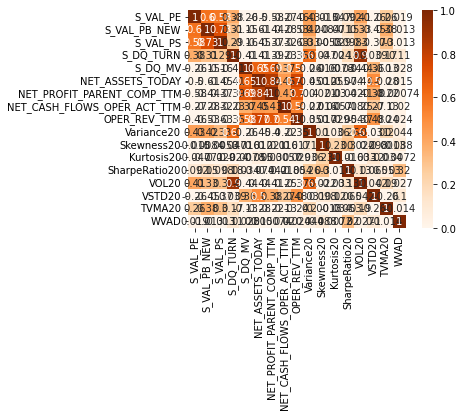

In [66]:
heatmap(df=df_factor[factor_list])

In [69]:
data = df_factor.drop(columns = [ 'S_DQ_PRECLOSE', 'S_DQ_OPEN' , 'S_DQ_HIGH' , 'S_DQ_LOW' ,'S_DQ_AVGPRICE', 'S_DQ_VOLUME'])

In [70]:
select = SelectKBest(
    f_regression,
    k=4
)

feature = data[factor_list]

selectFeature = select.fit_transform(
    feature,
    data['S_DQ_CLOSE']
)

feature.columns[select.get_support()]


Index(['S_VAL_PB_NEW', 'S_VAL_PS', 'VSTD20', 'TVMA20'], dtype='object')

------------------S_VAL_PE information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean           0.001  0.013  0.018
IC Std.           0.241  0.252  0.253
Risk-Adjusted IC  0.004  0.051  0.073
t-stat(IC)        0.148  1.856  2.633
p-value(IC)       0.882  0.064  0.009
IC Skew          -0.026 -0.194 -0.235
IC Kurtosis      -0.526 -0.599 -0.543

<Figure size 432x288 with 0 Axes>

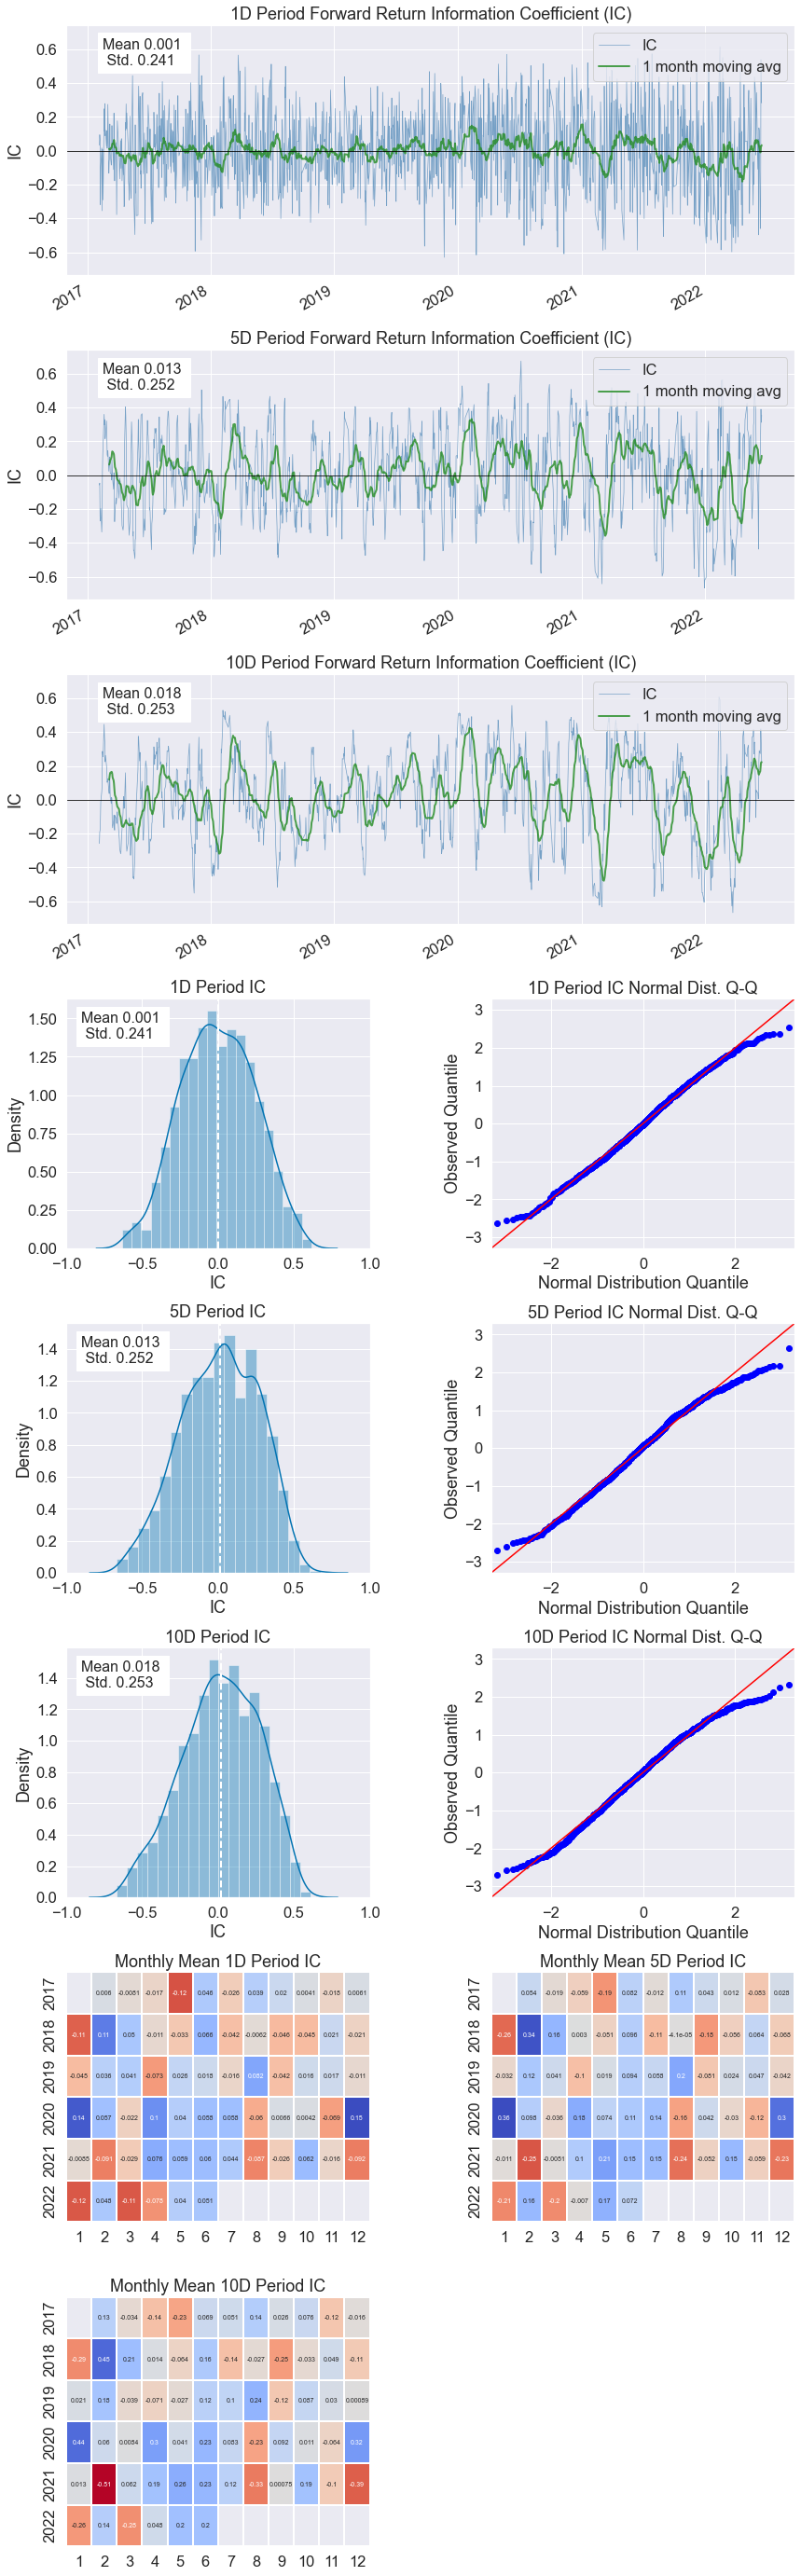

--------------------------------------------------------

------------------S_VAL_PB_NEW information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean           0.006  0.028  0.039
IC Std.           0.258  0.275  0.282
Risk-Adjusted IC  0.023  0.101  0.137
t-stat(IC)        0.830  3.652  4.947
p-value(IC)       0.407  0.000  0.000
IC Skew          -0.128 -0.319 -0.358
IC Kurtosis      -0.500 -0.458 -0.415

<Figure size 432x288 with 0 Axes>

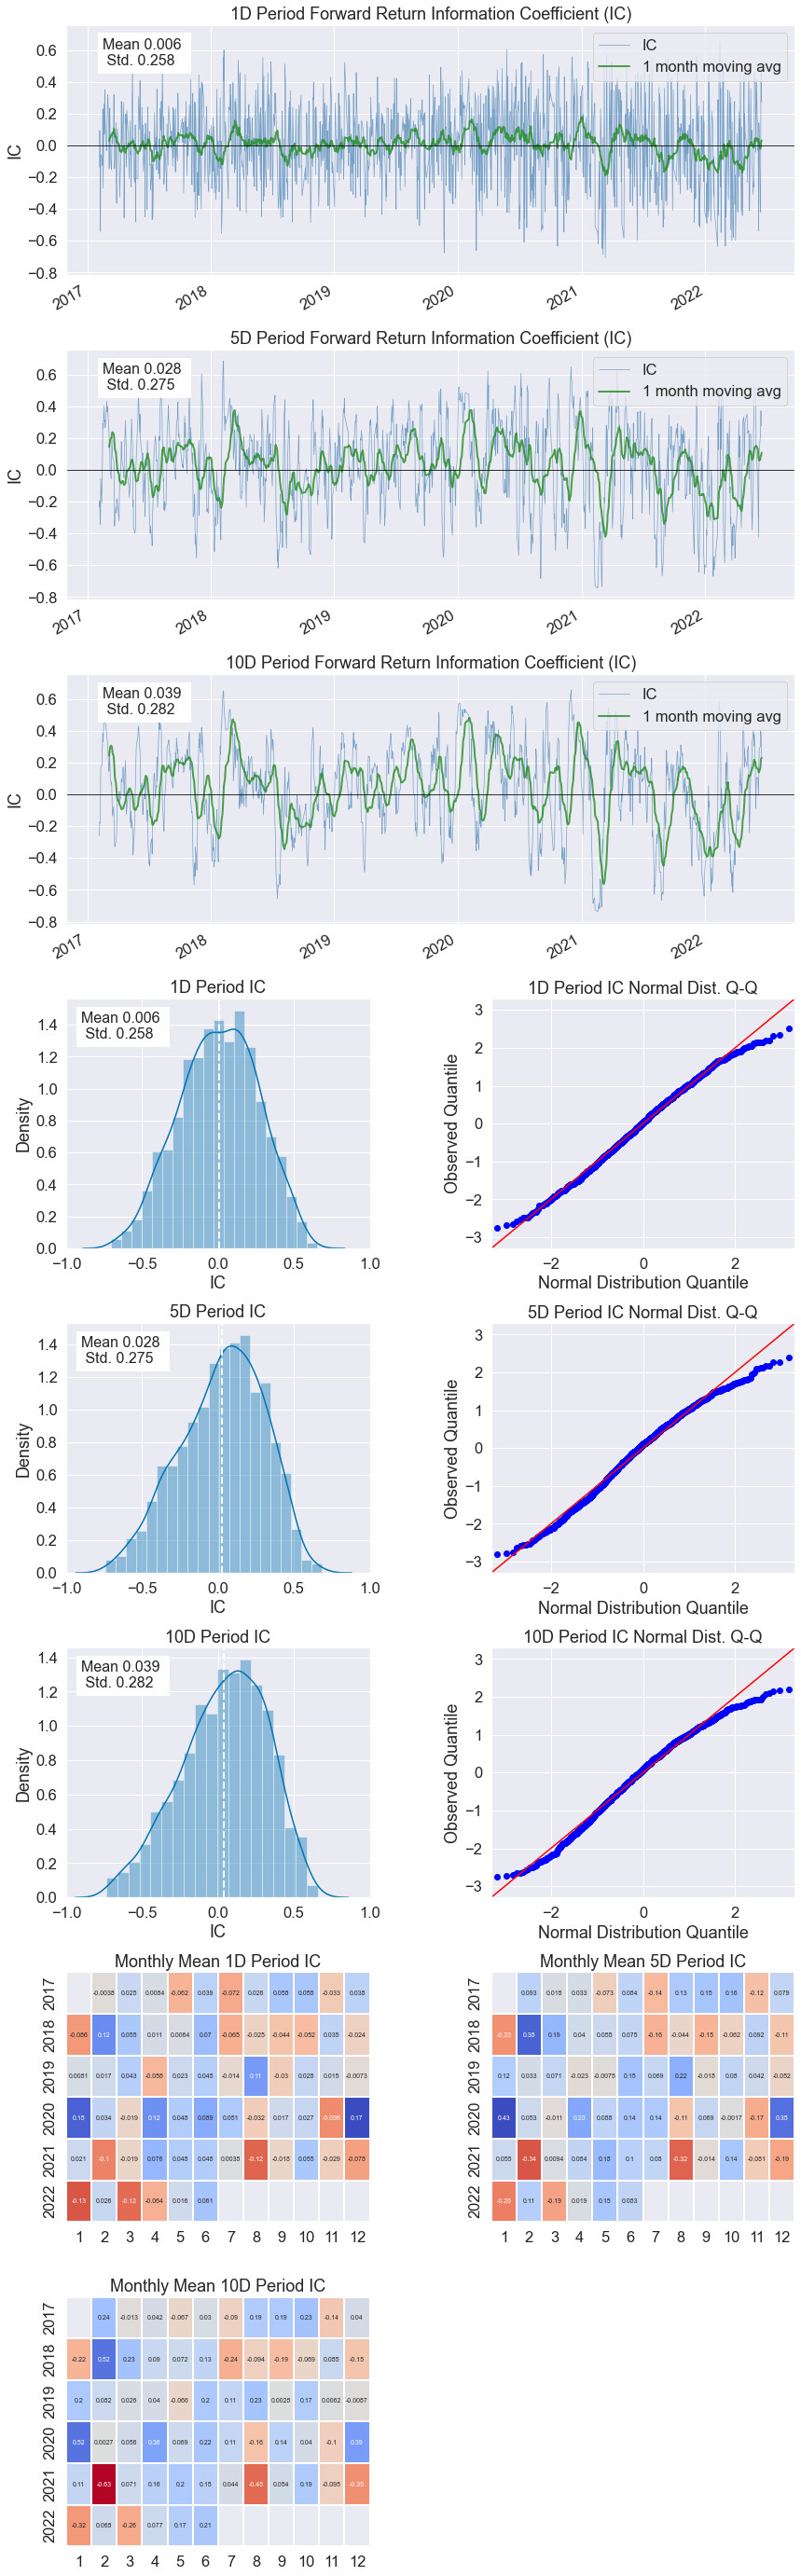

--------------------------------------------------------

------------------S_VAL_PS information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean           0.006  0.016  0.021
IC Std.           0.203  0.216  0.223
Risk-Adjusted IC  0.031  0.074  0.092
t-stat(IC)        1.111  2.692  3.320
p-value(IC)       0.267  0.007  0.001
IC Skew          -0.164 -0.324 -0.346
IC Kurtosis      -0.271 -0.190 -0.169

<Figure size 432x288 with 0 Axes>

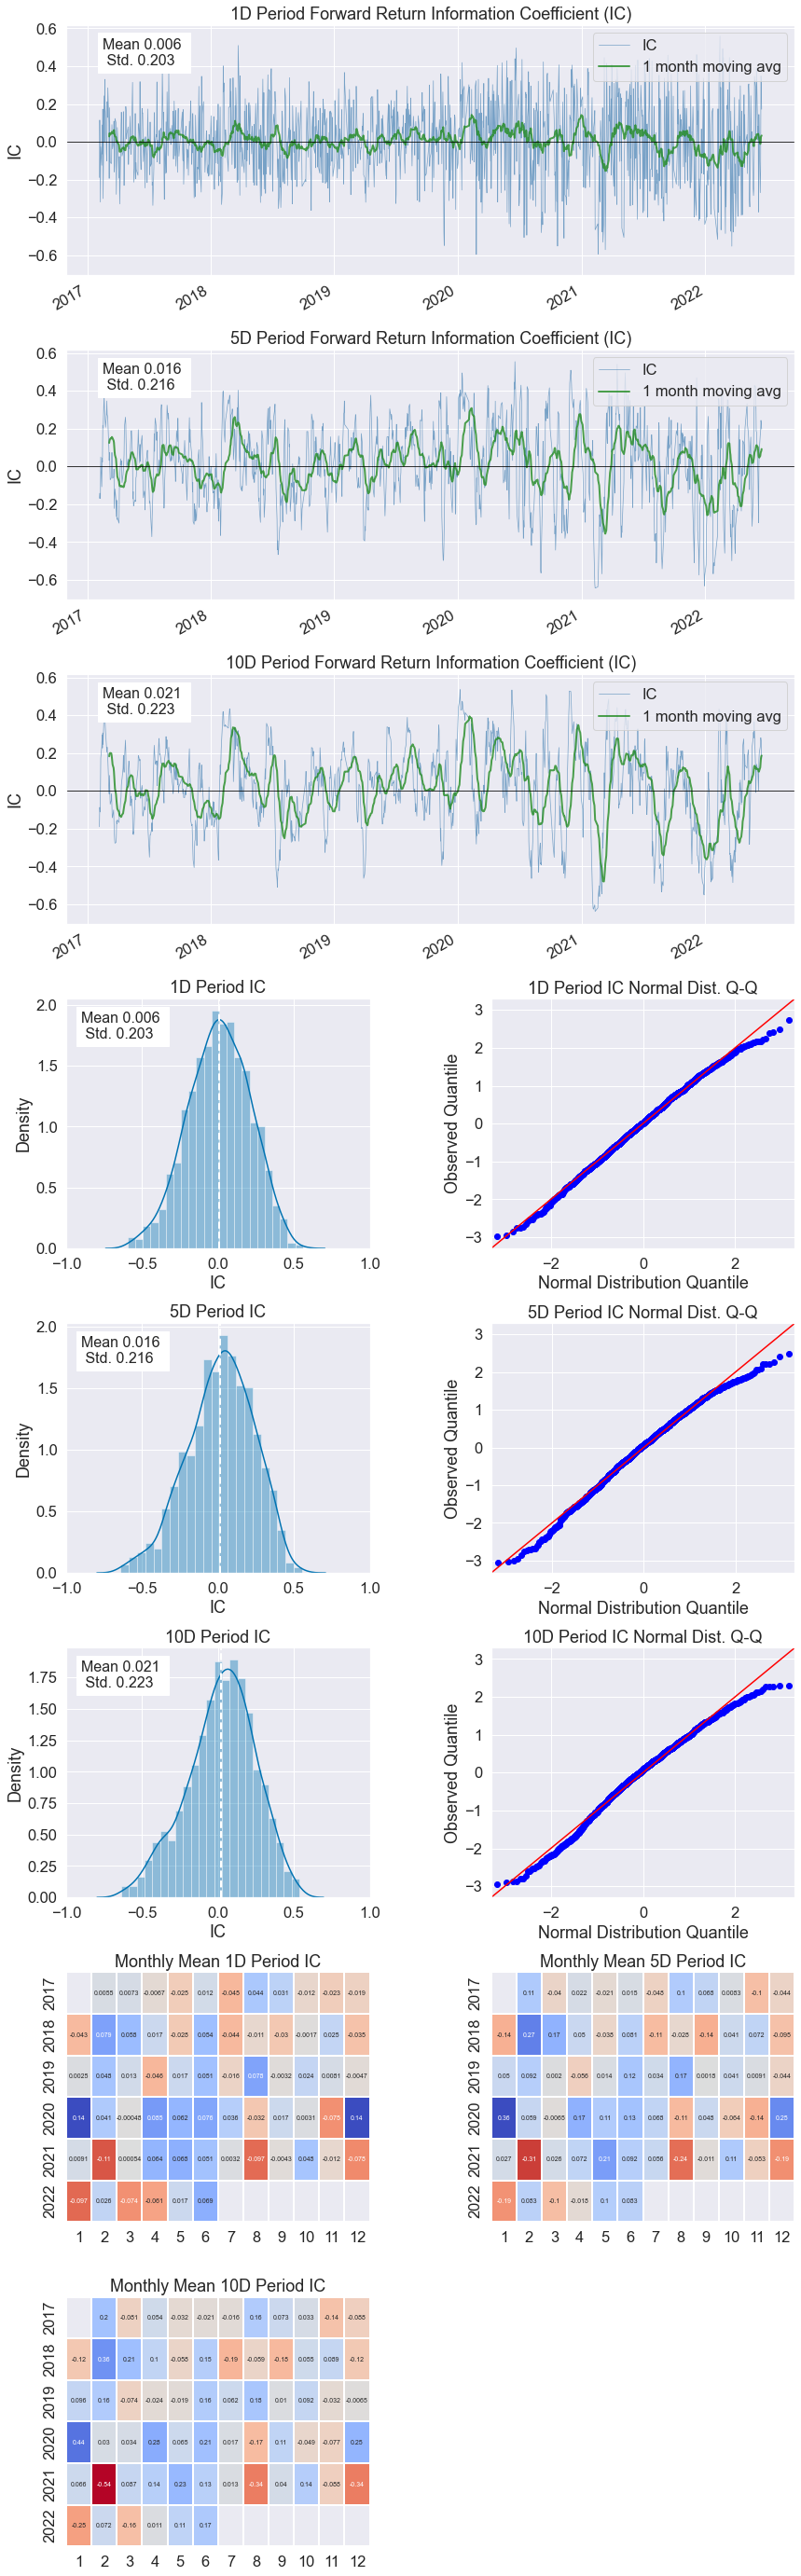

--------------------------------------------------------

------------------S_DQ_TURN information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean          -0.012 -0.004 -0.000
IC Std.           0.215  0.218  0.218
Risk-Adjusted IC -0.057 -0.019 -0.002
t-stat(IC)       -2.076 -0.683 -0.069
p-value(IC)       0.038  0.495  0.945
IC Skew           0.142 -0.021 -0.052
IC Kurtosis      -0.438 -0.721 -0.692

<Figure size 432x288 with 0 Axes>

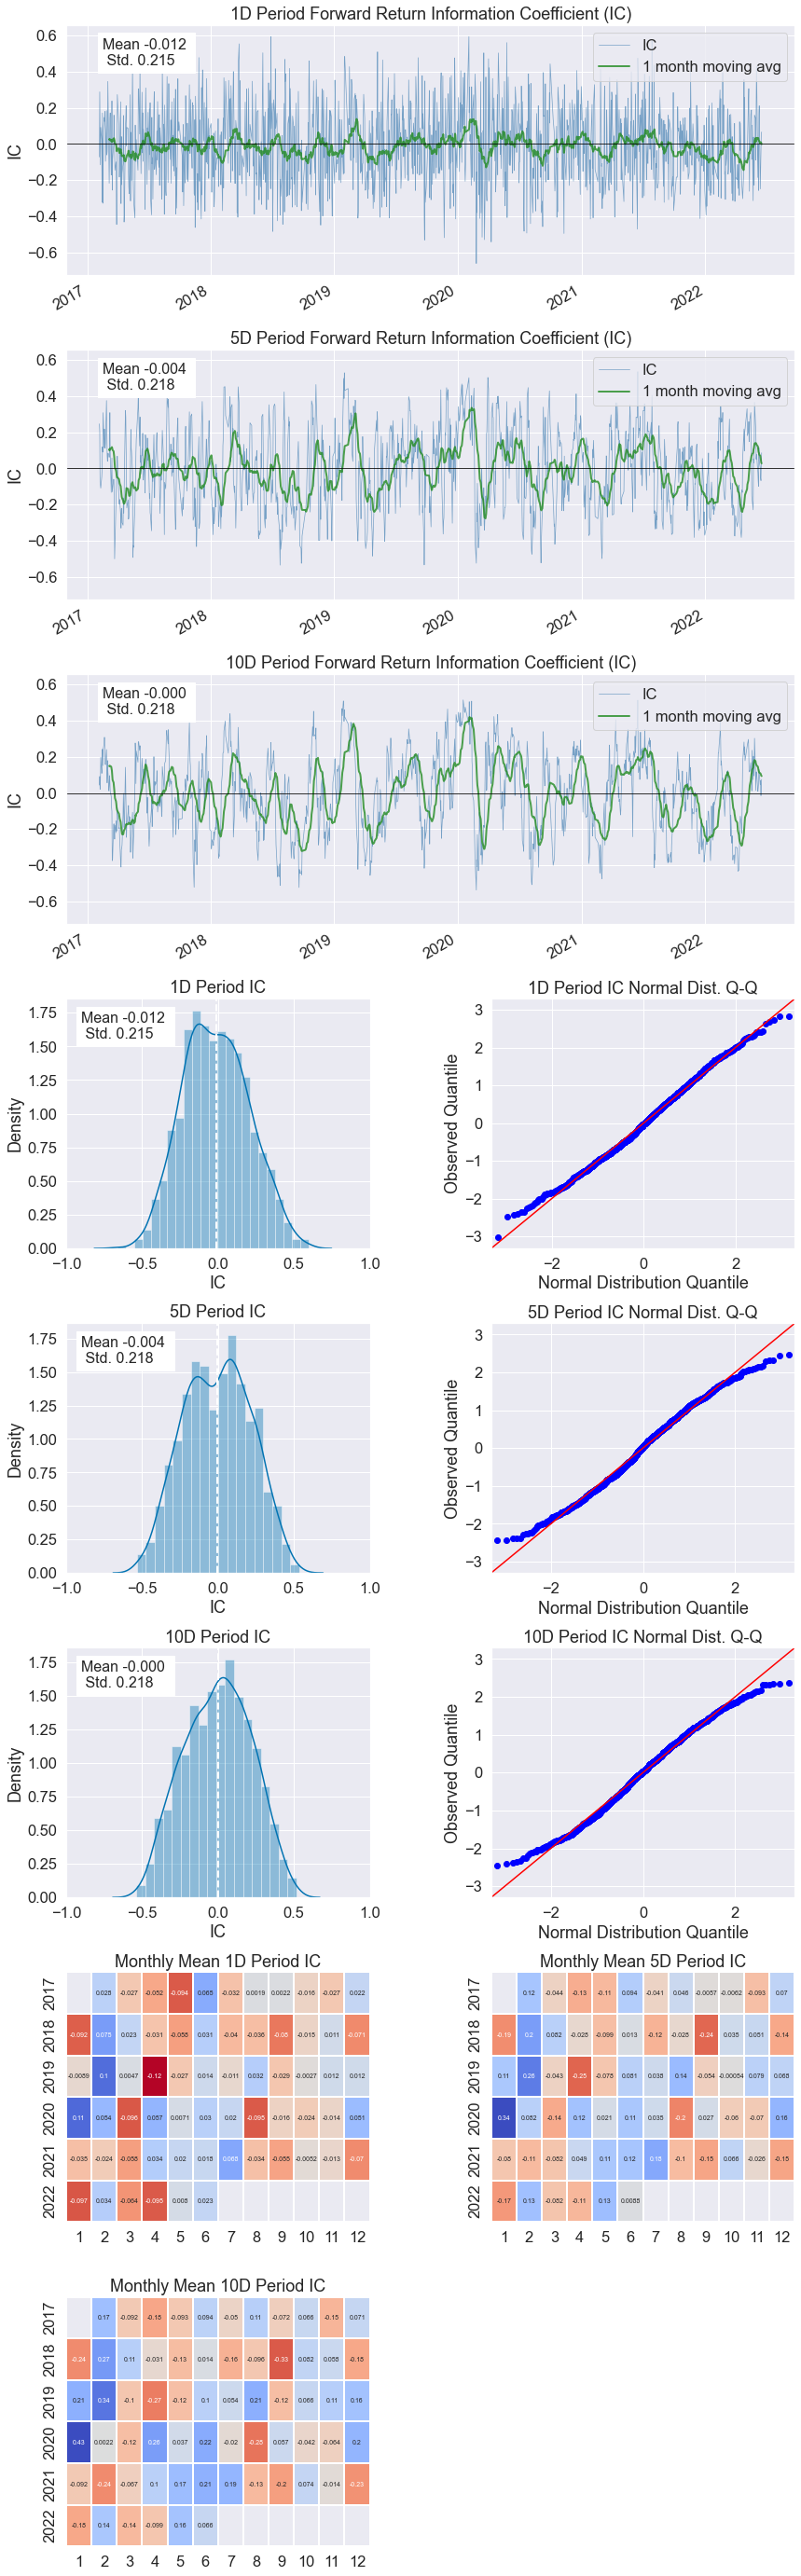

--------------------------------------------------------

------------------S_DQ_MV information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean          -0.003 -0.020 -0.033
IC Std.           0.176  0.187  0.183
Risk-Adjusted IC -0.018 -0.107 -0.182
t-stat(IC)       -0.669 -3.875 -6.593
p-value(IC)       0.504  0.000  0.000
IC Skew          -0.003  0.033 -0.031
IC Kurtosis       0.301  0.150  0.386

<Figure size 432x288 with 0 Axes>

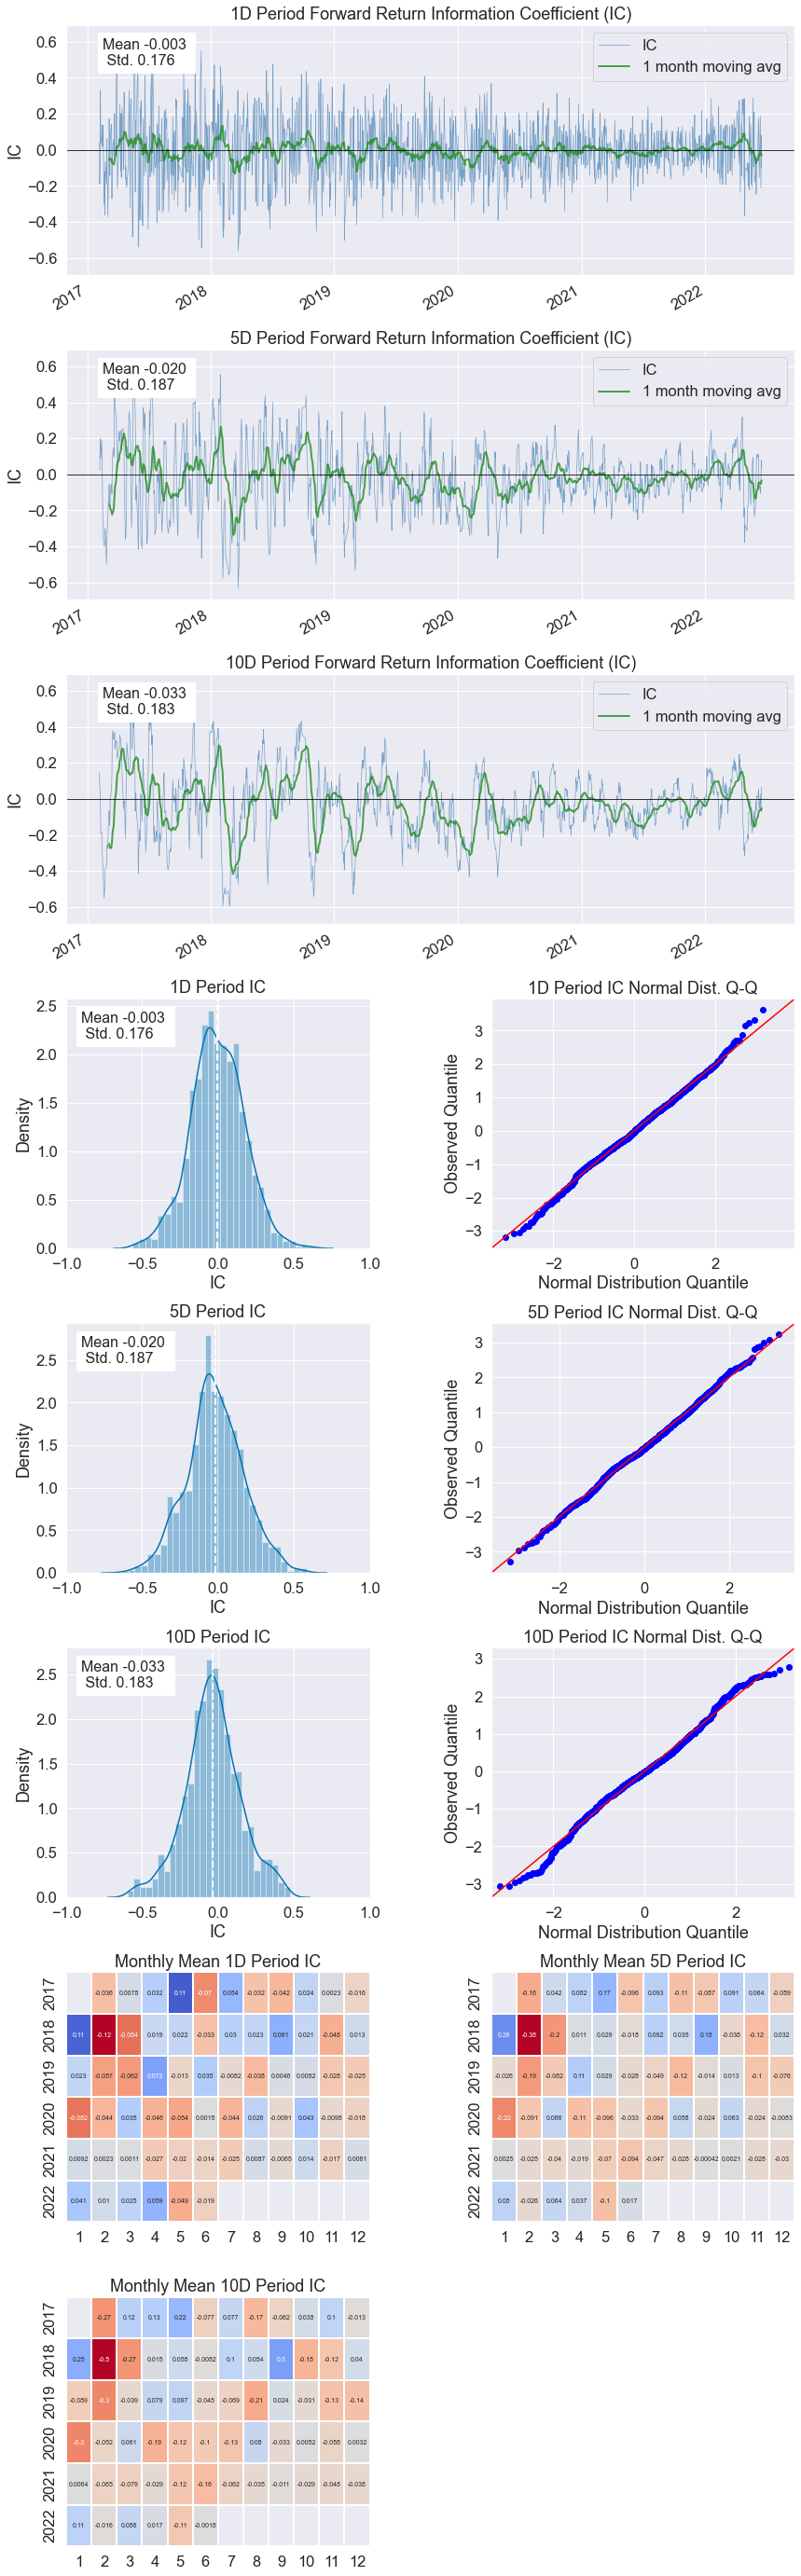

--------------------------------------------------------

------------------NET_ASSETS_TODAY information------------------
Dropped 0.8% entries from factor data: 0.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean          -0.009 -0.036 -0.052
IC Std.           0.249  0.266  0.270
Risk-Adjusted IC -0.035 -0.134 -0.192
t-stat(IC)       -1.272 -4.855 -6.930
p-value(IC)       0.204  0.000  0.000
IC Skew           0.019  0.143  0.150
IC Kurtosis      -0.590 -0.758 -0.632

<Figure size 432x288 with 0 Axes>

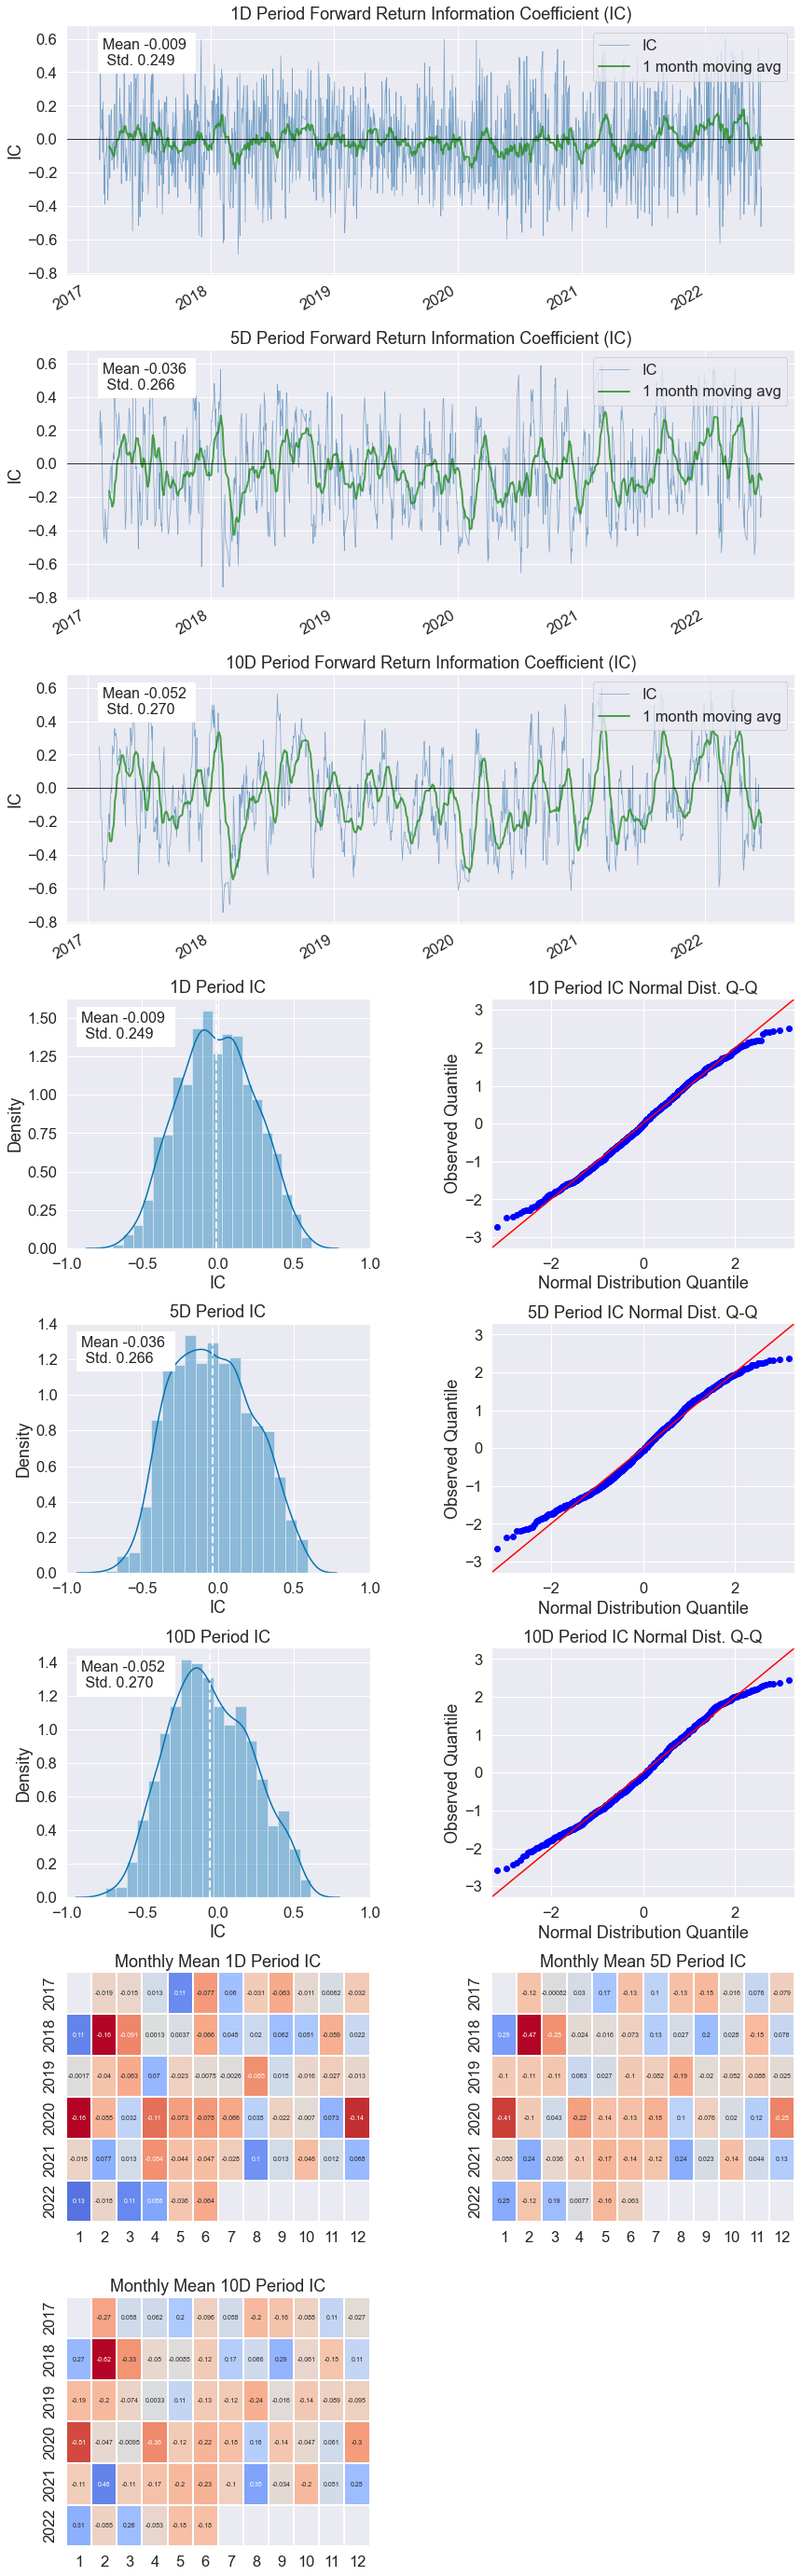

--------------------------------------------------------

------------------NET_PROFIT_PARENT_COMP_TTM information------------------
Dropped 4.2% entries from factor data: 0.8% in forward returns computation and 3.3% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D     5D    10D
IC Mean          -0.005 -0.025 -0.038
IC Std.           0.230  0.239  0.237
Risk-Adjusted IC -0.021 -0.103 -0.159
t-stat(IC)       -0.754 -3.653 -5.643
p-value(IC)       0.451  0.000  0.000
IC Skew          -0.011  0.098  0.109
IC Kurtosis      -0.541 -0.780 -0.647

<Figure size 432x288 with 0 Axes>

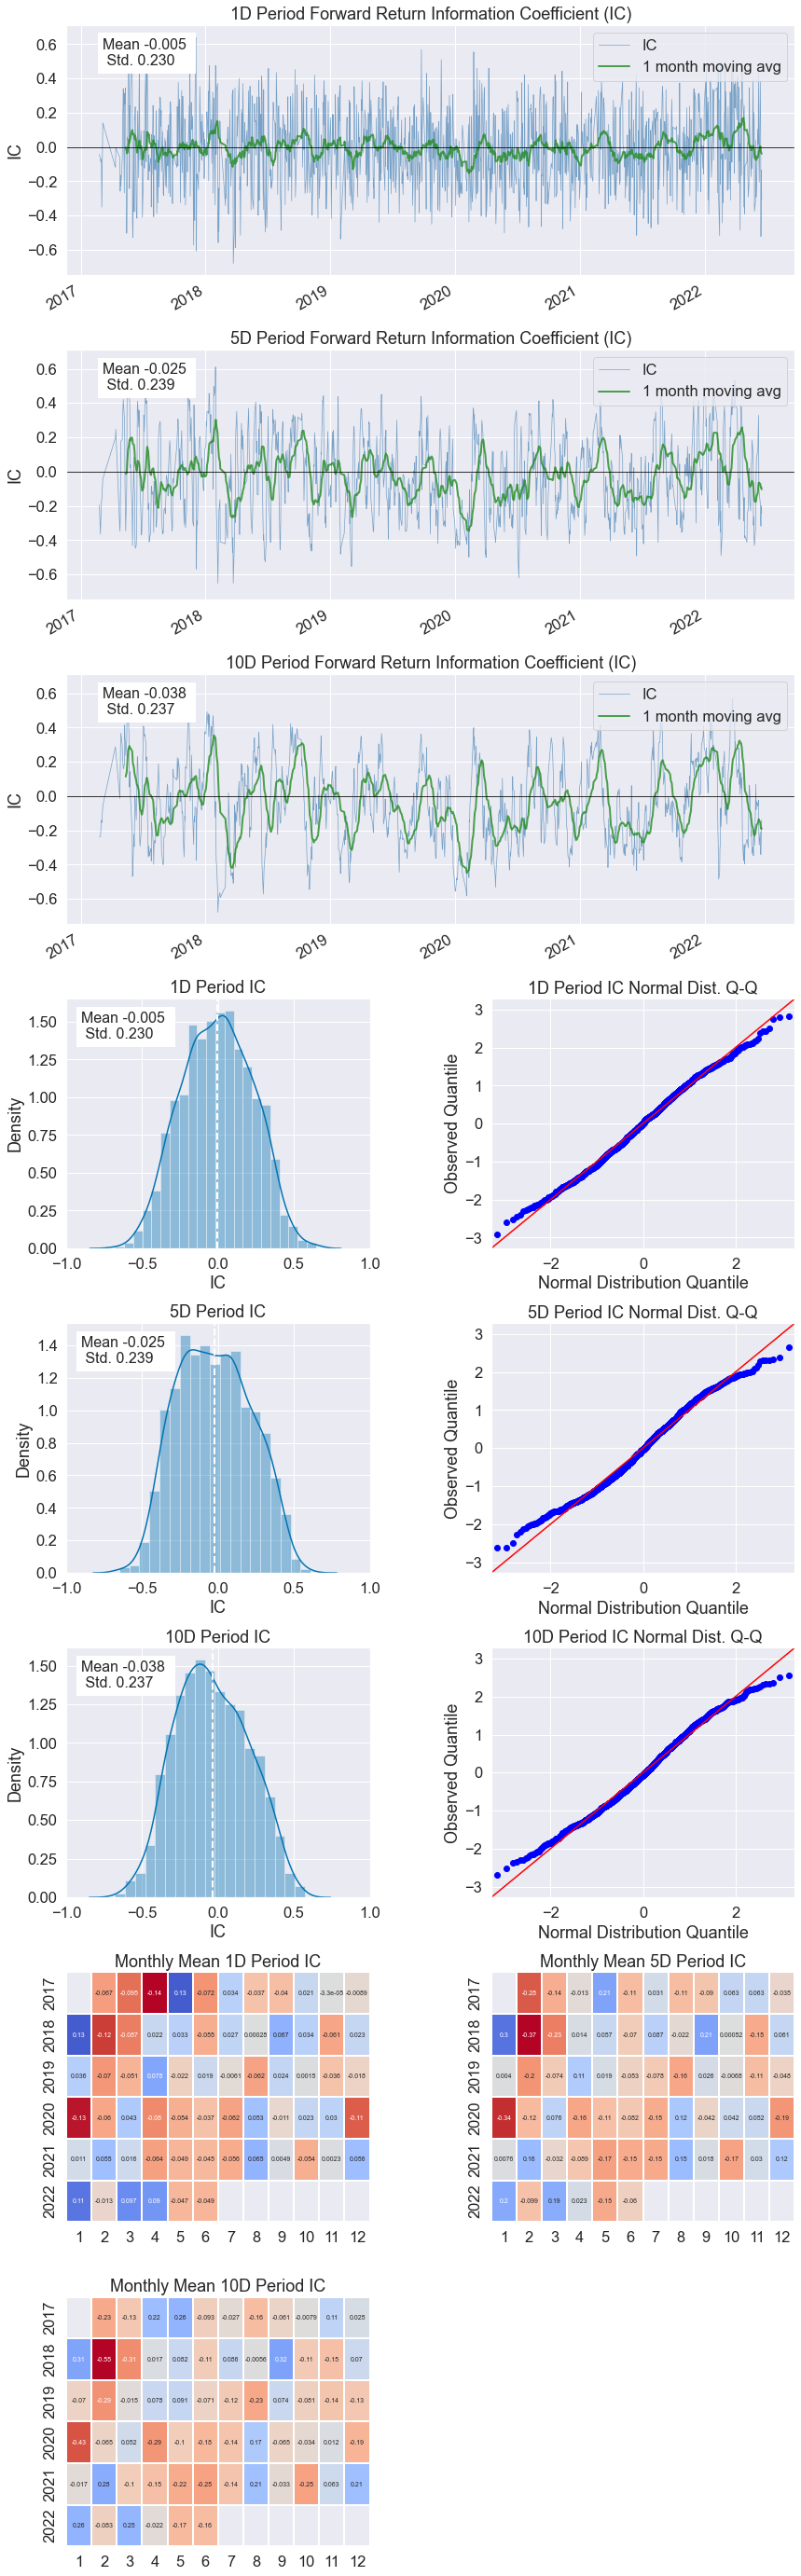

--------------------------------------------------------

------------------NET_CASH_FLOWS_OPER_ACT_TTM information------------------
Dropped 58.0% entries from factor data: 0.8% in forward returns computation and 57.2% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).


MaxLossExceededError: max_loss (35.0%) exceeded 58.0%, consider increasing it.

In [71]:
data['TRADE_DT'] = data['TRADE_DT'].astype(str)
data['TRADE_DT'] = data['TRADE_DT'].str[:4]+'-'+data['TRADE_DT'].str[4:6]+'-'+data['TRADE_DT'].str[6:8]
data['TRADE_DT'] = pd.to_datetime(data['TRADE_DT'])

data.set_index('TRADE_DT', inplace=True)
data.sort_index(inplace=True)

factor = data.set_index([data.index, data['S_INFO_WINDCODE']], drop=True)
close = data.pivot_table(index='TRADE_DT', columns='S_INFO_WINDCODE', values='S_DQ_CLOSE')
for fac in factor_list:
    print(f'------------------{fac} information------------------')
    factor_data = al.utils.get_clean_factor_and_forward_returns(factor[[fac]], close)
    al.tears.create_information_tear_sheet(factor_data, group_neutral=False)
    print('--------------------------------------------------------\n')